# scraping from website

https://www.ghsa.net/school-directory

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
school_directory = requests.get('https://www.ghsa.net/school-directory').text
soup = BeautifulSoup(school_directory, 'html.parser')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Drupal 7 (http://drupal.org)" name="Generator"/>
  <meta content="width" name="MobileOptimized"/>
  <meta content="true" name="HandheldFriendly"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   2024-2025 GHSA Member School Directory | GHSA.net
  </title>
  <style media="all" type="text/css">
   @import url("https://www.ghsa.net/modules/system/system.base.css?st9v30");
@import url("https://www.ghsa.net/modules/system/system.menus.css?st9v30");
@import url("https://www.ghsa.net/modules/system/system.messages.css?st9v30");
@import url("https://www.ghsa.net/modules/system/system.theme.css?st9v30");
  </style>
  <style media="all" type="text/css">
   @import url("https://www.ghsa.net/modules/aggregator/aggregator.css?st9v30");
@import url("https://www.ghsa.net/sites/all/mo

In [ ]:
dropdown_select = soup.find('select', id='edit-dropdown')

In [ ]:
print(dropdown_select.prettify())

js dynamic page detected, need to use `selenium` to automate.

## get school names

In [ ]:
options = dropdown_select.find_all('option')[1:]
print(len(options))

455


In [ ]:
school_names = [option.get_text() for option in options]
print(school_names)

['Academy for Classical Education ', 'Adairsville High School', 'Alcovy High School', 'Alexander High School', 'Allatoona High School', 'Alpharetta High School', 'Apalachee High School', 'Appling County High School', 'Aquinas High School', 'Arabia Mountain High School', 'Archer High School', 'Armuchee High School', 'Athens Academy', 'Atkinson County High School', 'Atlanta Classical Academy', 'Atlanta International School', 'B.E.S.T. Academy', 'Bacon County High School', 'Baconton Charter School', 'Bainbridge High School', 'Baker County High School', 'Baldwin High School', 'Banks County High School', 'Banneker High School', 'Barrow Arts & Sciences Academy', 'Beach High School', 'Ben Franklin Academy', 'Benedictine Military School', 'Berkmar High School', 'Berrien High School', 'Bleckley County High School', 'Blessed Trinity High School', 'Bowdon High School', 'Bradwell Institute', 'Brantley County High School', 'Bremen High School', 'Brooks County High School', 'Brookwood High School', 

## school counter & duplicate schools

In [ ]:
from collections import Counter

# Count the occurrences of each school name
school_name_counts = Counter(school_names)

# Find duplicates and store them in a dictionary
dup_school_name_counts = {name: count for name, count in school_name_counts.items() if count > 1}

print("Duplicate school names:", dup_school_name_counts)

Duplicate school names: {'Carver High School': 2, 'Central High School': 3, 'Heritage High School': 2, 'Johnson High School': 2, 'Lakeside High School': 2, 'Mt. Zion High School': 2, 'Northside High School': 2, 'Westside High School': 2, 'Woodland High School': 2}


## saving school names locally

In [ ]:
with open('school_names.txt', 'w') as file:
    for name in school_names:
        file.write(f"{name}\n")

## reading school names locally

In [ ]:
with open('school_names.txt', 'r') as file:
    school_names_from_file = [line.strip() for line in file.readlines()]

print(school_names_from_file)

['Academy for Classical Education', 'Adairsville High School', 'Alcovy High School', 'Alexander High School', 'Allatoona High School', 'Alpharetta High School', 'Apalachee High School', 'Appling County High School', 'Aquinas High School', 'Arabia Mountain High School', 'Archer High School', 'Armuchee High School', 'Athens Academy', 'Atkinson County High School', 'Atlanta Classical Academy', 'Atlanta International School', 'B.E.S.T. Academy', 'Bacon County High School', 'Baconton Charter School', 'Bainbridge High School', 'Baker County High School', 'Baldwin High School', 'Banks County High School', 'Banneker High School', 'Barrow Arts & Sciences Academy', 'Beach High School', 'Ben Franklin Academy', 'Benedictine Military School', 'Berkmar High School', 'Berrien High School', 'Bleckley County High School', 'Blessed Trinity High School', 'Bowdon High School', 'Bradwell Institute', 'Brantley County High School', 'Bremen High School', 'Brooks County High School', 'Brookwood High School', '

## group by colors

- data is scrapped by calling `src/web_automation.py` and `src/scraper.py`

In [ ]:
import pandas as pd

data = pd.read_csv('data/school_data.csv')

data.head()

,school_name,address,mascot,colors
0,Academy for Classical Education,"5665 New Forsyth Road Macon, GA 31210",Gryphon,Royal Blue & Emerald Green
1,Adairsville High School,"519 Old Highway 41, NW Adairsville, GA 30103",Tigers,"Green, White & Vegas Gold"
2,Alcovy High School,"14567 Highway 36 Covington, GA 30014",Tigers,Black & Safety Gold
3,Alexander High School,"6500 Alexander Parkway Douglasville, GA 30135-...",Cougars,"University Red, Black, & Silver"
4,Allatoona High School,"3300 Dallas Acworth Hwy Acworth, GA 30101",Buccaneers,"Red, Black & Silver"


In [ ]:
grouped_data = data.groupby('colors')

# Create a dictionary to store DataFrames for each group
grouped_dfs = {}

for color, group in grouped_data:
    grouped_dfs[color] = group.reset_index(drop=True)


In [ ]:
print(data['colors'].nunique())
print(len(grouped_dfs.keys()))

214
214


### submission 01

#### saving group by csv files

In [ ]:
for color, df in grouped_dfs.items():
    # Replace spaces and special characters in the color string with underscores
    filename = f"{color.replace(' ', '_').replace('&', 'and').replace(',', '').replace('/', '_')}_{len(df)}.csv"
    # Save the DataFrame to a CSV file
    df.to_csv(f"data/grouped_data/{filename}", index=False)

# target src: pdf

In [2]:
import fitz  # PyMuPDF
import pandas as pd
import re

def extract_school_info(pdf_path):
    # Open the PDF file
    document = fitz.open(pdf_path)
    school_data = []

    # Regular expressions to match the required patterns
    mascot_pattern = re.compile(r"mascot:\s*(.*)", re.IGNORECASE)
    color_pattern = re.compile(r"color:\s*(.*)", re.IGNORECASE)

    for page_num in range(len(document)):
        page = document.load_page(page_num)
        text = page.get_text("text")

        # Split text into lines
        lines = text.split('\n')
        school_info = {}
        for line in lines:
            mascot_match = mascot_pattern.search(line)
            color_match = color_pattern.search(line)

            if mascot_match:
                school_info['Mascot'] = mascot_match.group(1).strip()
            if color_match:
                school_info['Color'] = color_match.group(1).strip()
                # Assuming the school name is the previous line before mascot
                if 'Mascot' in school_info:
                    school_info['School'] = lines[lines.index(line) - 2].strip()
                    school_data.append(school_info)
                    school_info = {}

    # Create a DataFrame
    df = pd.DataFrame(school_data)
    return df

# Example usage
# pdf_path = 'path/to/your/pdf_file.pdf'
# df = extract_school_info(pdf_path)
# print(df)

ModuleNotFoundError: No module named 'fitz'

In [ ]:
# Open the PDF file

pdf_path = 'data\directory.pdf'
document = fitz.open(pdf_path)
school_data = []

# Regular expressions to match the required patterns
mascot_pattern = re.compile(r"mascot:\s*(.*)", re.IGNORECASE)
color_pattern = re.compile(r"color:\s*(.*)", re.IGNORECASE)

for page_num in range(1):
# for page_num in range(len(document)):
    page = document.load_page(page_num)
    text = page.get_text("text")

In [ ]:
text

'Georgia High School Association\nPost Office Box 271\n151 South Bethel Street\nThomaston, Georgia 30286-0004\n706-647-7473\nFax: 706-647-2638\nWebsite: www.ghsa.net\n2024-2025 GHSA Member School Directory\n'

In [ ]:
text = document.load_page(26).get_text("text")
text

"Jason McGuire 12*\nPatricia McPhee 13\nJoshua Mitchell 4\nAddison Morrow 15C,15F\nHayden Morrow 1,4\nJulia Roberson 3\nBilly Roper 4*\nKurt Scoggins 1\nDavid Sexauer 12G*\nAndrew J Smith 9\nCasey Smith 1\nKaylie Smith 15C\nRobby Stone 1\nDarryl Teems 6\nJohn Terrell 1,12B\nJennifer Tordrup 15B\nJimmy Whittemore 1,4\nRobert Wilson 1\nMelissa Winters 3*\nAlyson Worthey 18*\nALCOVY (8-AAAAA)\n14567 Highway 36\nCovington, GA 30014\nPhone: 770-784-4995\nBD: 205-454-4519\nFax: 770-784-4996\nwww.newtoncountyschools.org/alcovy\ncarter.patrick@newton.k12.ga.us\nColors: Black & Safety Gold\nMascot: Tigers\nDr Kristopher Williams P\nPatrick Carter AP,AD\nGina Clark AP\nRon Edwards AP\nKaren Gibbs AP\nDr Thomas Lowe AP\nBrian Coates BD\nJames Adams 3\nTyrease Brown 2\nDorothy Callaway 3\nAdrian Carr 1\nBrian Christian 1\nJeffrey Cook 3\nToby Davis 12*\nAdryenne Durden 15B,15F\nKymberli Durden 1,15B,15F\nWillie Durden 1\nSpencer Fortson 1*\nMaricus Glenn 2\nD'Lonzo Harris 1\nJustin Hunter 3*\nKen 

# submission 02

1. start from the whole data `school_data.csv`
2. have a reference color set
3. get rid of rows that have any other words than these reference colors
4. Addressing multi color part: if it have more than two, just take the first two colros from the reference
5. then group by colors and generate csv files for each group

In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('data/school_data.csv')
df.head()

,school_name,address,mascot,colors
0,Academy for Classical Education,"5665 New Forsyth Road Macon, GA 31210",Gryphon,Royal Blue & Emerald Green
1,Adairsville High School,"519 Old Highway 41, NW Adairsville, GA 30103",Tigers,"Green, White & Vegas Gold"
2,Alcovy High School,"14567 Highway 36 Covington, GA 30014",Tigers,Black & Safety Gold
3,Alexander High School,"6500 Alexander Parkway Douglasville, GA 30135-...",Cougars,"University Red, Black, & Silver"
4,Allatoona High School,"3300 Dallas Acworth Hwy Acworth, GA 30101",Buccaneers,"Red, Black & Silver"


## filter null colors

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school_name  455 non-null    object
 1   address      455 non-null    object
 2   mascot       454 non-null    object
 3   colors       454 non-null    object
dtypes: object(4)
memory usage: 14.3+ KB


In [4]:
null_colors = df[df['colors'].isnull()]
print(null_colors)

                                  school_name  \
381  Martha Ellen Stilwell School of the Arts   

                                       address     mascot colors  
381  2580 Mt. Zion Parkway Jonesboro, GA 30236  Stallions    NaN  


In [5]:
df = df.dropna(subset=['colors']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school_name  454 non-null    object
 1   address      454 non-null    object
 2   mascot       453 non-null    object
 3   colors       454 non-null    object
dtypes: object(4)
memory usage: 14.3+ KB


## reference color set

In [6]:
reference_colors = {
    "Red", "Orange", "White", "Black", "Royal Blue", "Purple", "Teal", "Silver",
    "Sports Yellow", "Maroon", "Pink", "Magenta", "Lime", "Navy", "Light Pink",
    "Dark Gray", "Yellow", "Neon Yellow", "Gold", "Neon Green", "Brown", "Green",
    "Crimson", "Light Blue", "Dark Green", "Blue", "Vegas Gold", "Forest Green",
    "Hunter Green", "Columbia Blue", "Carolina Blue", "Cardinal", "Scarlet"
}


In [7]:
reference_colors_lower = {color.lower() for color in reference_colors}

## func: isin_ref_colors

In [8]:
# color_string = "Royal Blue & Neon Green"
color_string = "Royal Blue, Emerald Green & White"

def isin_refcolors(color_string, reference_colors_lower: set[str]) -> bool:
    words = re.split(r'[,&]', color_string)
    words = [word.strip() for word in words if word.strip()]
    words = [word.lower() for word in words]
    # print(words)
    
    if len(words) > 2:
        return all(word in reference_colors_lower for word in words[:2])
    return all(word in reference_colors_lower for word in words)  

isin_refcolors(color_string, reference_colors_lower)

False

In [9]:
print(isin_refcolors("Royal Blue, red & Emerald Green", reference_colors_lower))
print(isin_refcolors("Royal Blue, Red & White", reference_colors_lower))
print(isin_refcolors("Royal Blue, Emerald Green & White", reference_colors_lower))
print(isin_refcolors("Royal Blue, & White", reference_colors_lower))

True
True
False
True


In [10]:
df.head()

,school_name,address,mascot,colors
0,Academy for Classical Education,"5665 New Forsyth Road Macon, GA 31210",Gryphon,Royal Blue & Emerald Green
1,Adairsville High School,"519 Old Highway 41, NW Adairsville, GA 30103",Tigers,"Green, White & Vegas Gold"
2,Alcovy High School,"14567 Highway 36 Covington, GA 30014",Tigers,Black & Safety Gold
3,Alexander High School,"6500 Alexander Parkway Douglasville, GA 30135-...",Cougars,"University Red, Black, & Silver"
4,Allatoona High School,"3300 Dallas Acworth Hwy Acworth, GA 30101",Buccaneers,"Red, Black & Silver"


## filtered data with only reference colors in f2

In [11]:
# Filter rows where isin_refcolors returns True
df2 = df[df['colors'].apply(lambda x: isin_refcolors(x, reference_colors_lower))]

# Reset the index of the filtered DataFrame
df2 = df2.reset_index(drop=True)

df2.head()

,school_name,address,mascot,colors
0,Adairsville High School,"519 Old Highway 41, NW Adairsville, GA 30103",Tigers,"Green, White & Vegas Gold"
1,Allatoona High School,"3300 Dallas Acworth Hwy Acworth, GA 30101",Buccaneers,"Red, Black & Silver"
2,Alpharetta High School,"3595 Webb Bridge Road Alpharetta, GA 30005",Raiders,"Black, Cardinal & Silver"
3,Apalachee High School,"940 Haymon Morris Road Winder, GA 30680",Wildcats,Navy & Gold
4,Appling County High School,"482 Blackshear Hwy Baxley, GA 31513",Pirates,"Red, White & Black"


In [15]:
print(df.shape)
print(df2.shape)

(454, 4)
(390, 4)


In [22]:
df2[df2['colors'].str.contains('Royal Blue/Silver')]

,school_name,address,mascot,colors


## df that got filtered out

In [23]:
# Find rows in df but not in df2
df_diff = df.merge(df2, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

df_diff

,school_name,address,mascot,colors
1,Academy for Classical Education,"5665 New Forsyth Road Macon, GA 31210",Gryphon,Royal Blue & Emerald Green
3,Alcovy High School,"14567 Highway 36 Covington, GA 30014",Tigers,Black & Safety Gold
4,Alexander High School,"6500 Alexander Parkway Douglasville, GA 30135-...",Cougars,"University Red, Black, & Silver"
10,Arabia Mountain High School,"6610 Browns Mill Road Stonecrest, GA 30038",Rams,"Winter Green, White & Navy"
17,B.E.S.T. Academy,"1190 Northwest Drive, NW Atlanta, GA 30318",Eagles,Navy & Old Gold
...,...,...,...,...
392,The Weber School,"6751 Roswell Road Atlanta, Georgia 30328",Rams,Navy Blue & White
399,Towers High School,"3919 Brookcrest Circle Decatur, GA 30032-3815",Titans,Maroon & Gray
410,Union Grove High School,"120 East Lake Road McDonough, GA 30252-4812",Wolverines,Maroon & Gray
412,Utopian Academy for the Arts High School,"2299 Old Rex Morrow Road Morrow, GA 30260",Eagles,"Burgundy, Black, Silver"


In [ ]:
df_diff.to_csv('data/school_data_diff.csv', index=False)

## func: assign_f2_colors

In [25]:
df2.head()

,school_name,address,mascot,colors
0,Adairsville High School,"519 Old Highway 41, NW Adairsville, GA 30103",Tigers,"Green, White & Vegas Gold"
1,Allatoona High School,"3300 Dallas Acworth Hwy Acworth, GA 30101",Buccaneers,"Red, Black & Silver"
2,Alpharetta High School,"3595 Webb Bridge Road Alpharetta, GA 30005",Raiders,"Black, Cardinal & Silver"
3,Apalachee High School,"940 Haymon Morris Road Winder, GA 30680",Wildcats,Navy & Gold
4,Appling County High School,"482 Blackshear Hwy Baxley, GA 31513",Pirates,"Red, White & Black"


In [ ]:
def assign_f2_colors(color_string: str) -> str|None:
    if not isinstance(color_string, str):  # Handle non-string cases
        return None  

    words = re.split(r'[,&]', color_string)
    words = [word.strip().lower() for word in words if word.strip()]
    
    # Select matched colors (first 2 if more than 2, all otherwise)
    matched_colors = [word for word in (words[:2] if len(words) > 2 else words)]
    
    return ", ".join(matched_colors) if matched_colors else None

In [ ]:
print(assign_f2_colors("Royal Blue, red & Emerald Green"))
print(assign_f2_colors("Royal Blue, Red & White"))
print(assign_f2_colors("Royal Blue, Emerald Green & White"))
print(assign_f2_colors("Royal Blue, & White"))

royal blue, red
royal blue, red
royal blue, emerald green
royal blue, white


In [ ]:
# Apply function to DataFrame
df2["f2_colors"] = df2["colors"].apply(lambda x: assign_f2_colors(x))

In [28]:
df2.head()

,school_name,address,mascot,colors,f2_colors
0,Adairsville High School,"519 Old Highway 41, NW Adairsville, GA 30103",Tigers,"Green, White & Vegas Gold","green, white"
1,Allatoona High School,"3300 Dallas Acworth Hwy Acworth, GA 30101",Buccaneers,"Red, Black & Silver","red, black"
2,Alpharetta High School,"3595 Webb Bridge Road Alpharetta, GA 30005",Raiders,"Black, Cardinal & Silver","black, cardinal"
3,Apalachee High School,"940 Haymon Morris Road Winder, GA 30680",Wildcats,Navy & Gold,"navy, gold"
4,Appling County High School,"482 Blackshear Hwy Baxley, GA 31513",Pirates,"Red, White & Black","red, white"


## group by f2_colors

In [29]:
grouped_data = df2.groupby('f2_colors')

# Create a dictionary to store DataFrames for each group
grouped_dfs = {}

for color, group in grouped_data:
    grouped_dfs[color] = group.reset_index(drop=True)


In [30]:
print(len(grouped_dfs.keys()))

89


#### saving group by csv files

In [32]:
for color, df in grouped_dfs.items():
    # Replace spaces and special characters in the color string with underscores
    filename = f"{color.replace(' ', '_').replace('&', 'and').replace(',', '').replace('/', '_')}_{len(df)}.csv"
    # Save the DataFrame to a CSV file
    df.to_csv(f"data/grouped_data2/{filename}", index=False)

## visualize

In [2]:
import os
import pandas as pd

In [4]:
folder = "data/grouped_data2"
file_data = []

for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        # Remove `.csv` and split at the last underscore
        name = filename[:-4]
        *color_parts, count = name.split('_')
        color = '_'.join(color_parts)
        file_data.append((color.replace('_', ' '), int(count)))

df = pd.DataFrame(file_data, columns=["color_combo", "count"])


In [5]:
df

,color_combo,count
0,black vegas gold,7
1,green black,1
2,cardinal vegas gold,5
3,purple gold,13
4,blue white,16
...,...,...
84,purple vegas gold,3
85,purple white,8
86,red vegas gold,1
87,gold scarlet,1


In [6]:
df_sorted = df.sort_values("count", ascending=False).reset_index(drop=True)


In [7]:
df_sorted

,color_combo,count
0,red white,47
1,red black,29
2,black gold,25
3,blue white,16
4,royal blue white,15
...,...,...
84,navy cardinal,1
85,navy columbia blue,1
86,red vegas gold,1
87,gold scarlet,1


In [16]:
threshold = 10  # Change as needed
df_above = df_sorted[df_sorted["count"] >= threshold]
df_below = df_sorted[df_sorted["count"] < threshold]

# Combine the 'Others'
other_total = df_below["count"].sum()
df_final = df_above.copy()
df_final.loc[len(df_final)] = ["Other", other_total]


In [17]:
df_final

,color_combo,count
0,red white,47
1,red black,29
2,black gold,25
3,blue white,16
4,royal blue white,15
5,blue gold,15
6,purple gold,13
7,navy white,12
8,green gold,12
9,Other,206


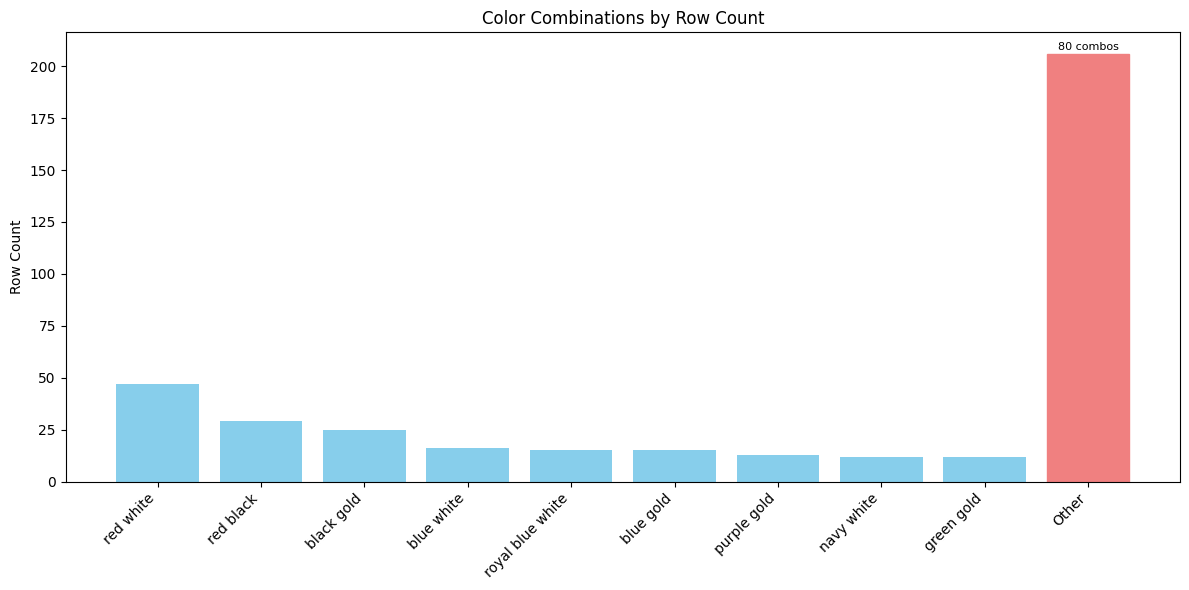

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(df_final["color_combo"], df_final["count"], color="skyblue")
plt.xticks(rotation=45, ha='right')
plt.title("Color Combinations by Row Count")
plt.ylabel("Row Count")
plt.tight_layout()

# Annotate the 'Other' bar
if "Other" in df_final["color_combo"].values:
    idx = df_final[df_final["color_combo"] == "Other"].index[0]
    combos = ", ".join(df_below["color_combo"].tolist())
    bars[idx].set_color("lightcoral")
    plt.text(idx, df_final["count"].iloc[idx] + 1, f"{len(df_below)} combos", ha='center', va='bottom', fontsize=8)


# Submission 03: Final

In [1]:
from src.colorsort import main

Number of unique colors: 104
Number of total rows: 422
Grouped CSV files saved to data/grouped_data3


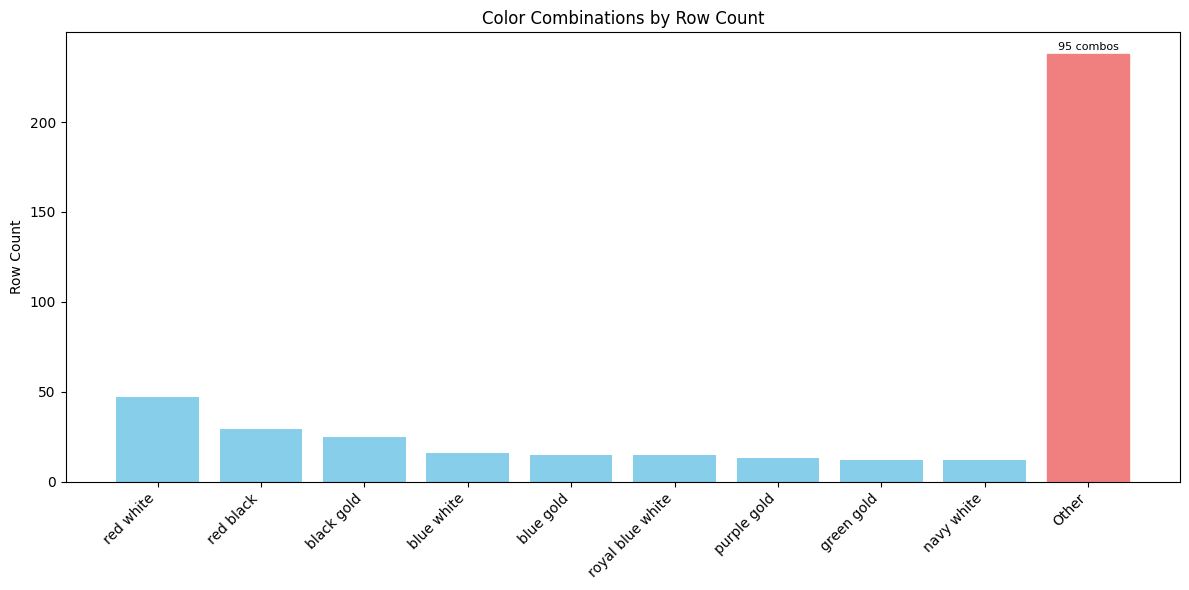

In [2]:
main()